In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math
sym.init_printing(use_unicode=True)
x,y,z = sym.symbols('x y z')

#lista de coeficientes
coeff = sym.var('a1,a2,a3')

#funcion aproximada
fi=[
    x*(x-1)*sym.sin(sym.pi*x),
    x**2*(x-1)*sym.sin(sym.pi*x),
    x**3*(x-1)*sym.sin(sym.pi*x)
   ]

u = np.sum([coeff[i]*fi[i] for i in range(len(coeff))])


#derivadas
du = sym.diff(u,x)
d2u = sym.diff(du,x)
d3u = sym.diff(d2u,x)
d4u = sym.diff(d3u,x)

u_0 = u.subs(x,0)
u_1 = u.subs(x,1)
du_0 = du.subs(x,0)
du_1 = du.subs(x,1)

print("Comprobando condiciones de borde:")
print("u(0) = {0}".format(u_0))
print("u(1) = {0}".format(u_1))
print("u'(0) = {0}".format(du_0))
print("u'(1) = {0}".format(du_1))

if(u_0!=0 or u_1!=0 or u_0!=0 or du_1!=0):
    print("La función de prueba no es valida")
else:
    print("La función de prueba es valida")

#residuo
rx = d4u+u-1

#total puntos a graficar
n_points = 50
#eje x (valores de x)
x_points=np.linspace(0,1,n_points)


Comprobando condiciones de borde:
u(0) = 0
u(1) = 0
u'(0) = 0
u'(1) = 0
La función de prueba es valida


In [2]:
#recibe una lista de puntos de colocacion
def colocacion(points):
    global u,coeff,rx
    equations=[] #lista con ecuaciones
    for p in points:
        equations.append(rx.subs(x,p))
    #Transformar a sistema Ax=b
    A,b = sym.linear_eq_to_matrix(equations,coeff)
    A = np.array(A).astype(np.float64)
    b = np.array(b).astype(np.float64)
    #resolucion del sistema
    solution = np.linalg.solve(A,b)
    pairs = list(zip(coeff,map(lambda x:x[0],solution.tolist())))
    #funcion final
    final_function = u.subs(pairs)
    return final_function 

#recibe una lista de puntos que definen los subdominios
def subdominio(points):
    global u,coeff,rx
    I = [] #Lista de integrales a resolver
    for i in range(1,len(points)):
        I.append(sym.integrate(rx,(x,points[i-1],points[i])))
    A,b = sym.linear_eq_to_matrix(I,coeff)
    A = np.array(A).astype(np.float64)
    b = np.array(b).astype(np.float64)
    #resolucion del sistema
    solution = np.linalg.solve(A,b)
    pairs = list(zip(coeff,map(lambda x:x[0],solution.tolist())))
    #funcion final
    final_function = u.subs(pairs)
    return final_function

def min_cuadrados():
    global u,coeff,rx
    I=[] #Lista de integrales a resolver
    for a in coeff:
        I.append(sym.integrate(rx*sym.diff(rx,a),(x,0,1)))
    A,b = sym.linear_eq_to_matrix(I,coeff)
    A = np.array(A).astype(np.float64)
    b = np.array(b).astype(np.float64)
    #resolucion del sistema
    solution = np.linalg.solve(A,b)
    pairs = list(zip(coeff,map(lambda x:x[0],solution.tolist())))
    #funcion final
    final_function = u.subs(pairs)
    return final_function

def momentos():
    global u,coeff,rx
    I=[] #Lista de integrales a resolver
    for i in enumerate(coeff):
        I.append(sym.integrate(x**i[0]*rx,(x,0,1)))
    A,b = sym.linear_eq_to_matrix(I,coeff)
    A = np.array(A).astype(np.float64)
    b = np.array(b).astype(np.float64)
    #resolucion del sistema
    solution = np.linalg.solve(A,b)
    pairs = list(zip(coeff,map(lambda x:x[0],solution.tolist())))
    #funcion final
    final_function = u.subs(pairs)
    return final_function
    
def galerkin():
    global u,coeff,rx,fi
    I=[] #Lista de integrales a resolver
    i = 1
    for a in fi:
        I.append(sym.integrate(rx*a,(x,0,1)))
        A,b = sym.linear_eq_to_matrix(I,coeff)
    A = np.array(A).astype(np.float64)
    b = np.array(b).astype(np.float64)
    #resolucion del sistema
    solution = np.linalg.solve(A,b)
    pairs = list(zip(coeff,map(lambda x:x[0],solution.tolist())))
    #funcion final
    final_function = u.subs(pairs)
    return final_function
    

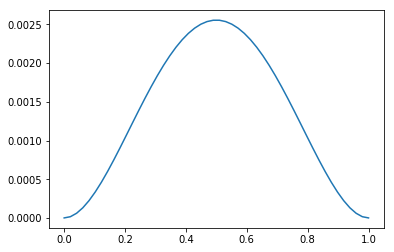

In [3]:
#Colocacion
colocacion_fun=colocacion([0.25,0.5,0.75])
colocacion_y=list(map(lambda x_val:colocacion_fun.subs(x,x_val),x_points))
plt.plot(x_points,colocacion_y)

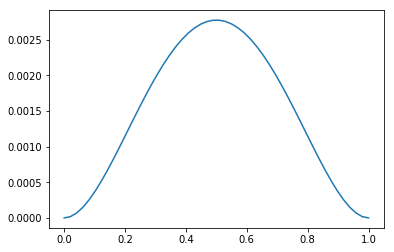

In [4]:
#Subdominio
subdom_fun=subdominio([0,0.33333333,0.66666667,1])
subdom_y=list(map(lambda x_val:subdom_fun.subs(x,x_val),x_points))
plt.plot(x_points,subdom_y)

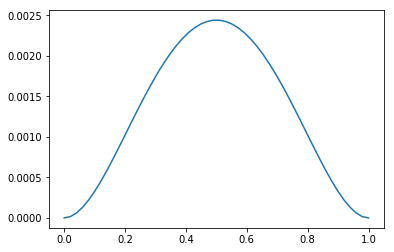

In [5]:
#Minimos cuadrados
min_cuad_fun=min_cuadrados()
min_cuad_y=list(map(lambda x_val:min_cuad_fun.subs(x,x_val),x_points))
plt.plot(x_points,min_cuad_y)

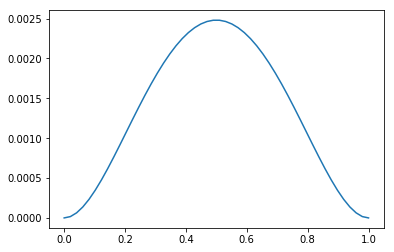

In [6]:
#Momentos
moments_fun=momentos()
moments_y=list(map(lambda x_val:moments_fun.subs(x,x_val),x_points))
plt.plot(x_points,moments_y)

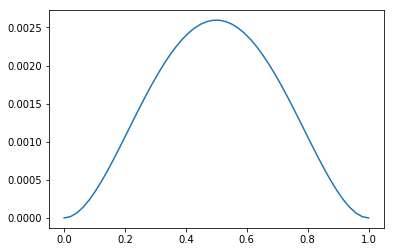

In [7]:
#Galerkin
galerkin_fun=galerkin()
galerkin_y=list(map(lambda x_val:galerkin_fun.subs(x,x_val),x_points))
plt.plot(x_points,galerkin_y)

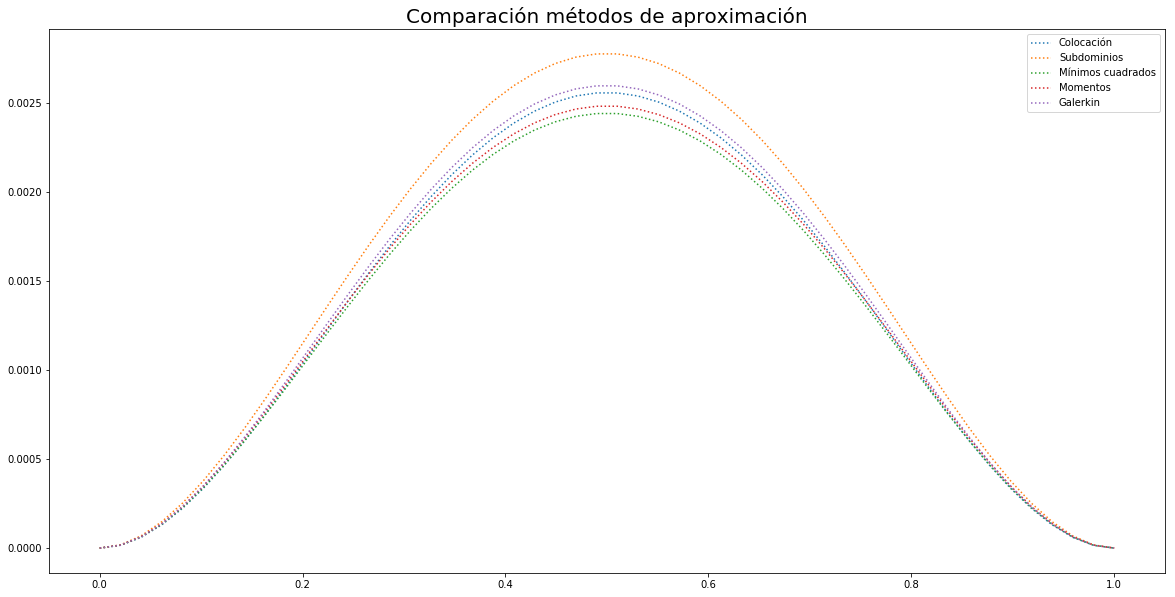

In [46]:
#plt.title("Comparación métodos de aproximación")
#plt.plot(x_points,colocacion_y,x_points,subdom_y,x_points,min_cuad_y,x_points,moments_y,x_points,galerkin_y)

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.plot(x_points,colocacion_y,label="Colocación",linestyle=":")
ax.plot(x_points,subdom_y,label="Subdominios",linestyle=":")
ax.plot(x_points,min_cuad_y,label="Mínimos cuadrados",linestyle=":")
ax.plot(x_points,moments_y,label="Momentos",linestyle=":")
ax.plot(x_points,galerkin_y,label="Galerkin",linestyle=":")
ax.set_title("Comparación métodos de aproximación",fontsize=20)
ax.legend()


In [21]:
print('Máx. colocacion: {0}'.format(np.max(np.asarray(colocacion_y).astype(np.float64))))
print('Máx. subdominios: {0}'.format(np.max(np.asarray(subdom_y).astype(np.float64))))
print('Máx. minimos cuadrados: {0}'.format(np.max(np.asarray(min_cuad_y).astype(np.float64))))
print('Máx. momentos: {0}'.format(np.max(np.asarray(moments_y).astype(np.float64))))
print('Máx. galerkin: {0}'.format(np.max(np.asarray(galerkin_y).astype(np.float64))))

Max. colocacion: 0.0025546099323542704
Max. subdominios: 0.002773622442349351
Max. minimos cuadrados: 0.002438967980261434
Max. momentos: 0.0024799321879960734
Max. galerkin: 0.002594348420304455
